In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [24]:
df = pd.read_csv("/home/chenjunyu/UIUC/Lab/DeeCamp2022/GEMs/OptKnock_test2.csv", sep=" ")
df = df[:1023]

In [26]:
df.loc[:, "combList"] = df.loc[:, "Comb"].str.split(", ")

In [27]:
df

,Comb,growthRate,minProd,maxProd,combList
0,ACALD,0.194807,0.064572,0.064599,[ACALD]
1,ALCD2x,0.194807,0.064572,0.064599,[ALCD2x]
2,GLCabcpp,0.241502,0.080049,0.080056,[GLCabcpp]
3,GND,0.241502,0.080049,0.080056,[GND]
4,HEX1,0.241502,0.080049,0.080056,[HEX1]
...,...,...,...,...,...
1018,"ACALD, ALCD2x, GLCabcpp, HEX1, LDH_D, PFL, PFK...",NaN,0.000000,0.000000,"[ACALD, ALCD2x, GLCabcpp, HEX1, LDH_D, PFL, PF..."
1019,"ACALD, ALCD2x, GND, HEX1, LDH_D, PFL, PFK, PYK...",NaN,0.000000,0.000000,"[ACALD, ALCD2x, GND, HEX1, LDH_D, PFL, PFK, PY..."
1020,"ACALD, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, P...",NaN,0.000000,0.000000,"[ACALD, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, ..."
1021,"ALCD2x, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, ...",NaN,0.000000,0.000000,"[ALCD2x, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK,..."


In [28]:
rnxList = ['ACALD', 'ALCD2x', 'GLCabcpp', 'GND', 'HEX1', 'LDH_D', 'PFL', 'PFK', 'PYK', 'TKT2']

In [31]:
for g in rnxList:
    df[g] = 0

In [32]:
for i in range(len(df)):
    #print(i)
    for j in df["combList"][i]:
        df.loc[i, j] = 1

In [33]:
df

,Comb,growthRate,minProd,maxProd,combList,ACALD,ALCD2x,GLCabcpp,GND,HEX1,LDH_D,PFL,PFK,PYK,TKT2
0,ACALD,0.194807,0.064572,0.064599,[ACALD],1,0,0,0,0,0,0,0,0,0
1,ALCD2x,0.194807,0.064572,0.064599,[ALCD2x],0,1,0,0,0,0,0,0,0,0
2,GLCabcpp,0.241502,0.080049,0.080056,[GLCabcpp],0,0,1,0,0,0,0,0,0,0
3,GND,0.241502,0.080049,0.080056,[GND],0,0,0,1,0,0,0,0,0,0
4,HEX1,0.241502,0.080049,0.080056,[HEX1],0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,"ACALD, ALCD2x, GLCabcpp, HEX1, LDH_D, PFL, PFK...",NaN,0.000000,0.000000,"[ACALD, ALCD2x, GLCabcpp, HEX1, LDH_D, PFL, PF...",1,1,1,0,1,1,1,1,1,1
1019,"ACALD, ALCD2x, GND, HEX1, LDH_D, PFL, PFK, PYK...",NaN,0.000000,0.000000,"[ACALD, ALCD2x, GND, HEX1, LDH_D, PFL, PFK, PY...",1,1,0,1,1,1,1,1,1,1
1020,"ACALD, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, P...",NaN,0.000000,0.000000,"[ACALD, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, ...",1,0,1,1,1,1,1,1,1,1
1021,"ALCD2x, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, ...",NaN,0.000000,0.000000,"[ALCD2x, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK,...",0,1,1,1,1,1,1,1,1,1


In [34]:
df["combNum"] = 0

In [35]:
for i in range(len(df)):
    df.loc[i, "combNum"] = len(df["combList"][i])

In [36]:
df

,Comb,growthRate,minProd,maxProd,combList,ACALD,ALCD2x,GLCabcpp,GND,HEX1,LDH_D,PFL,PFK,PYK,TKT2,combNum
0,ACALD,0.194807,0.064572,0.064599,[ACALD],1,0,0,0,0,0,0,0,0,0,1
1,ALCD2x,0.194807,0.064572,0.064599,[ALCD2x],0,1,0,0,0,0,0,0,0,0,1
2,GLCabcpp,0.241502,0.080049,0.080056,[GLCabcpp],0,0,1,0,0,0,0,0,0,0,1
3,GND,0.241502,0.080049,0.080056,[GND],0,0,0,1,0,0,0,0,0,0,1
4,HEX1,0.241502,0.080049,0.080056,[HEX1],0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,"ACALD, ALCD2x, GLCabcpp, HEX1, LDH_D, PFL, PFK...",NaN,0.000000,0.000000,"[ACALD, ALCD2x, GLCabcpp, HEX1, LDH_D, PFL, PF...",1,1,1,0,1,1,1,1,1,1,9
1019,"ACALD, ALCD2x, GND, HEX1, LDH_D, PFL, PFK, PYK...",NaN,0.000000,0.000000,"[ACALD, ALCD2x, GND, HEX1, LDH_D, PFL, PFK, PY...",1,1,0,1,1,1,1,1,1,1,9
1020,"ACALD, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, P...",NaN,0.000000,0.000000,"[ACALD, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, ...",1,0,1,1,1,1,1,1,1,1,9
1021,"ALCD2x, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, ...",NaN,0.000000,0.000000,"[ALCD2x, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK,...",0,1,1,1,1,1,1,1,1,1,9


In [8]:
X = df.loc[:, rnxList].values
y = df.loc[:, "maxProd"].values

In [12]:
# define our visualiser
def boxplot(data, group_name, quantity, title = '', point_size = 10):
    plt.style.use('seaborn-whitegrid')
    plt.style.use('seaborn-poster')
    fig, ax = plt.subplots(1, 1)
    ax.grid(zorder=0)
    # Usual boxplot
    ax = sns.boxplot(x=group_name, y=quantity, data=data)
    # Add jitter with the swarmplot function.
    ax = sns.swarmplot(x=group_name, y=quantity, data=data, color='k', size=point_size)
    ax.set_title(title)
    return ax

In [11]:
# Define our GOLD STANDARD MODEL
gold_regressor = xgb.XGBRegressor(
objective = 'reg:squarederror',
n_estimators = 500,
learning_rate = 0.01,
max_depth = 6,
min_child_weight = 1,
subsample = 0.8
)
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# Training ...
gold_regressor.fit(X_train, y_train,eval_set=[(X_val, y_val)],eval_metric='mae', early_stopping_rounds=15, verbose=0)

# Predicting the Test set results
y_pred = gold_regressor.predict(X_test)

# Prediction Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)
print('mse :',mse)
print('mae :',mae)
print('R2 :', r2)

mse : 1.9177853802826565e-05
mae : 0.004054008128267239
R2 : 0.9998818188480482


In [37]:
## reconstruct the Paper plot
# Part 1: Reshape Dataset
# Load All Dataset in One DataFrame
df

,Comb,growthRate,minProd,maxProd,combList,ACALD,ALCD2x,GLCabcpp,GND,HEX1,LDH_D,PFL,PFK,PYK,TKT2,combNum
0,ACALD,0.194807,0.064572,0.064599,[ACALD],1,0,0,0,0,0,0,0,0,0,1
1,ALCD2x,0.194807,0.064572,0.064599,[ALCD2x],0,1,0,0,0,0,0,0,0,0,1
2,GLCabcpp,0.241502,0.080049,0.080056,[GLCabcpp],0,0,1,0,0,0,0,0,0,0,1
3,GND,0.241502,0.080049,0.080056,[GND],0,0,0,1,0,0,0,0,0,0,1
4,HEX1,0.241502,0.080049,0.080056,[HEX1],0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,"ACALD, ALCD2x, GLCabcpp, HEX1, LDH_D, PFL, PFK...",NaN,0.000000,0.000000,"[ACALD, ALCD2x, GLCabcpp, HEX1, LDH_D, PFL, PF...",1,1,1,0,1,1,1,1,1,1,9
1019,"ACALD, ALCD2x, GND, HEX1, LDH_D, PFL, PFK, PYK...",NaN,0.000000,0.000000,"[ACALD, ALCD2x, GND, HEX1, LDH_D, PFL, PFK, PY...",1,1,0,1,1,1,1,1,1,1,9
1020,"ACALD, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, P...",NaN,0.000000,0.000000,"[ACALD, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, ...",1,0,1,1,1,1,1,1,1,1,9
1021,"ALCD2x, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK, ...",NaN,0.000000,0.000000,"[ALCD2x, GLCabcpp, GND, HEX1, LDH_D, PFL, PFK,...",0,1,1,1,1,1,1,1,1,1,9


sort the max production and bin them

/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 84.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ch

<AxesSubplot:xlabel='combNum', ylabel='maxProd'>

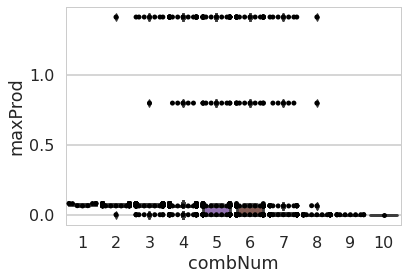

In [38]:
# Part 2: Plotting
boxplot(df, 'combNum', 'maxProd', point_size=5)

But that's not the step number!!!

One-hot encoding of different combinations